<h2>Solutions IPH 18/19 Ex. 1</h2>

Last time, a couple of questions were asked about functions and function arguments in Python. I strongly advise reading the following page from the Python reference manual, in order to obtain answers to the posed questions. 

https://en.wikibooks.org/wiki/Python_Programming/Functions#Declaring_Arguments

<h3>Task 1: Basic Image Manipulation</h3>

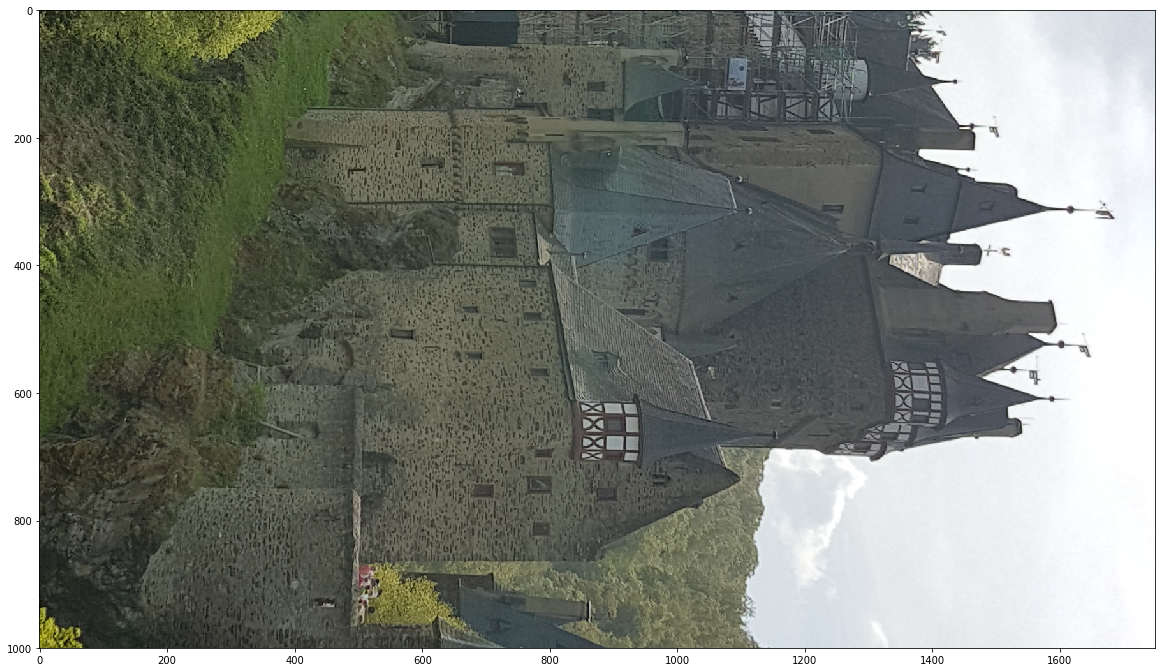

In [6]:
# The matplotlib magic function and library imports
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt

img = mpimg.imread('castle.jpg')
plt.rcParams["figure.figsize"] = (20,15)

# Start typing your code here.
img_cropped = img[1500:2500, 750:2500]
img_flipped = cv2.flip(img_cropped, 1)

# End of your code

plt.imshow(img_flipped)

<h3>Task 2: Basic Adjustments of Brightness and Contrast</h3>

Please note that the following code only adjusts the global images brightness, in a primitive manner. We will cover more advanced contrast enhancement techniques in the next exercise session.

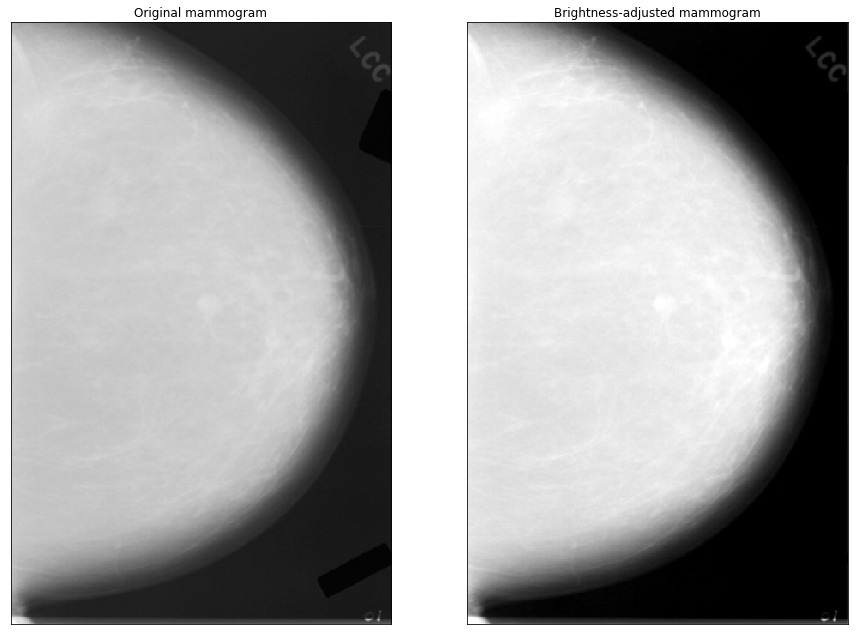

In [11]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt


pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('mammogram1.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
gain = 1.5
bias = -80

cimg = img*gain + bias
cimg = np.clip(cimg,0, 255)
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original mammogram'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Brightness-adjusted mammogram'), plt.xticks([]), plt.yticks([])
plt.show()

<h3>Task 3: Image Rotation</h3>

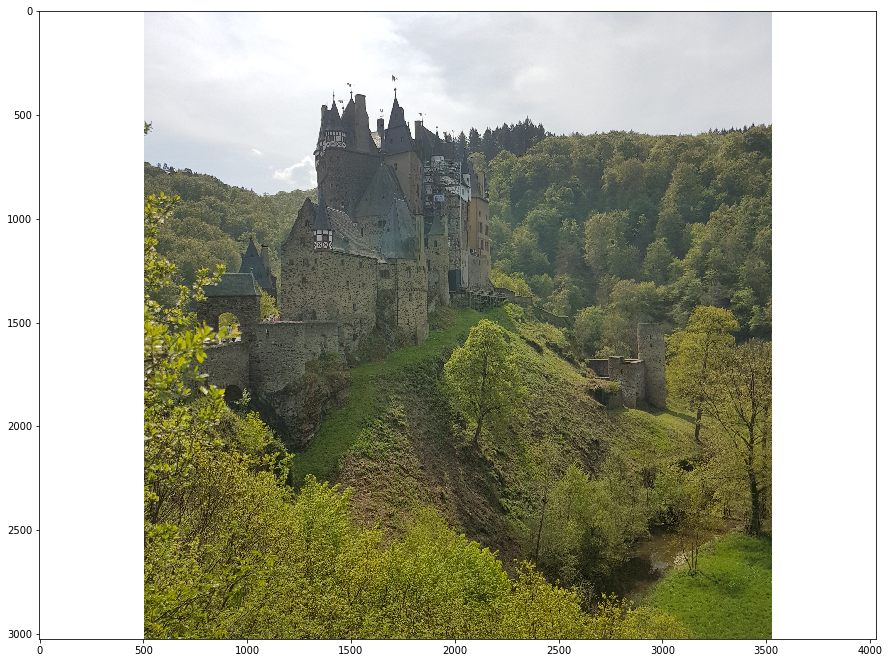

In [32]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (15, 20)

#Start typing your code here
img = mpimg.imread('castle.jpg')
rows, cols, depth = img.shape
dst = img
angle = -90
M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1) #obtains the rotation matrix by specifying the center of rotation and angle
cv2.warpAffine(img, M, (cols,rows), dst, borderValue=(255,255,255,255)) # apply the transformation matrix to the image

imgplotst = plt.imshow(dst)

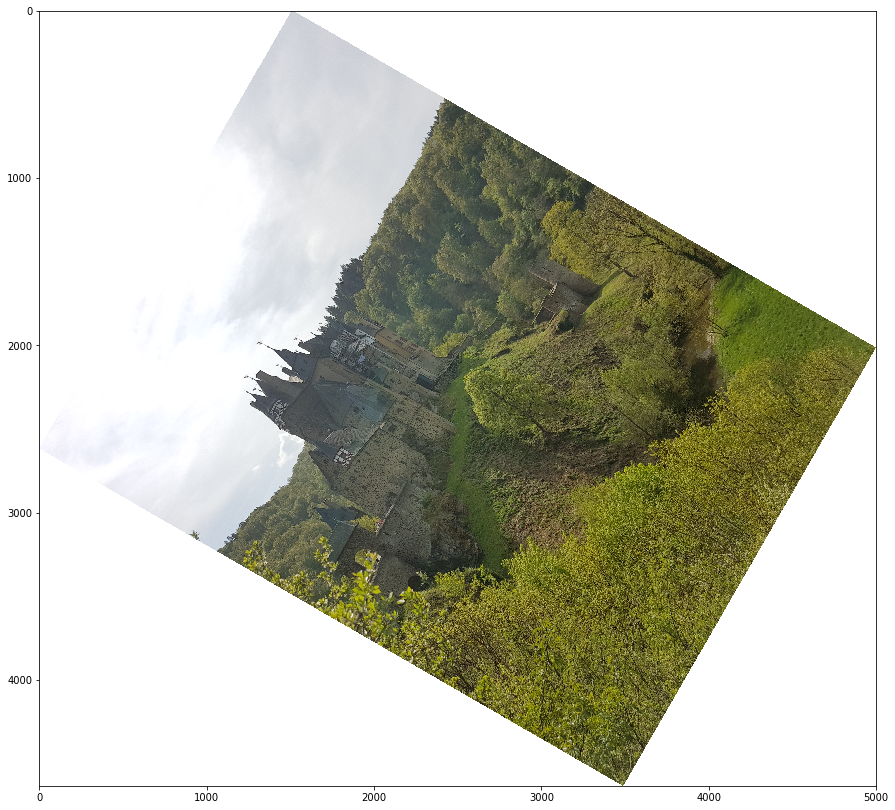

In [34]:
%matplotlib inline

import cv2
import matplotlib.image as mpimg
import numpy as np

from matplotlib import pyplot as plt

img = mpimg.imread('castle.jpg')
rows, cols, depth = img.shape

def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w / 2, h / 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH),flags=0, borderValue=(255, 255, 255, 255))

# End of your code
    
dst = rotate_bound(img, 30)

plt.rcParams["figure.figsize"] = (15, 20)
imgplotst = plt.imshow(dst)